In [1]:
%matplotlib inline
import pystokes, pyforces
import numpy as np, matplotlib.pyplot as plt

In [2]:
# particle radius, self-propulsion speed, particles fluid viscosity
b, vs, Np, eta = 1.0, 0.4, 6, 0.1

kSpring, kBond = 1, 4                     # kSpring: stiffness of the spring and kBond: is natural length 

# instantiate the libraries
rbm    = pystokes.unbounded.Rbm(radius=b, particles=Np, viscosity=eta)
forces = pyforces.forceFields.Forces(particles=Np)

In [3]:
# initialize the positions
r0 = np.zeros(3*Np);   r  = np.zeros(3*Np)
k=0
for i in range(2):
    for j in range(int(Np/2)):
        r0[k]    = -5 + i*10
        r0[k+Np] = -5+kBond*j
        k = k+1


def configPlot(r):
    "plot the position of the particles"
    x, y = r[0:Np], r[Np:2*Np]
    plt.plot(x, y, 'o', ms=20)
    plt.xlim(-np.max(x)-20, 20+np.max(x));    plt.ylim(-np.max(y)-20, 20+-np.max(x))

In [4]:
ljeps=.01; ljrmin=4

def simulate(Nt, dt, r):
    F  = np.zeros(3*Np)
    v  = np.zeros(3*Np)

    for i in range(Nt):
        v, F = v*0, F*0

        forces.lennardJones (F, r, ljeps, ljrmin )
        forces.spring(F, r, kBond, kSpring)
        rbm.mobilityTT(v, r, F)

        r = r + v*dt
        #print (np.max(F), np.max(v), i)

        if i%200==0:
            configPlot(r)
            plt.show()

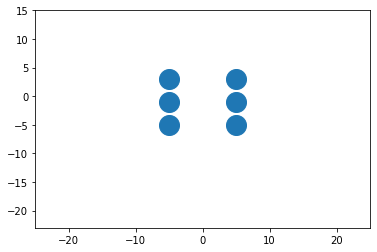

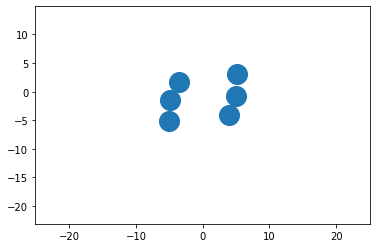

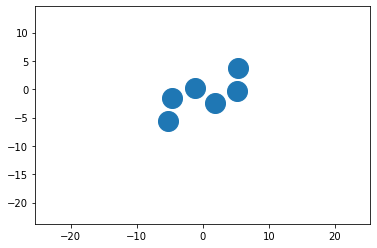

In [5]:
Nt, dt = 400, 0.01

# initial condition
r = r0   
configPlot(r)

# simulate and plot
plt.figure()
simulate(Nt, dt, r)